# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def getThreshold(image):
    image =  image if(image.dtype=='uint8')else np.array(image*255,dtype= np.uint8);
#     print(image);
# Histogram returns 2D array first num of pixels , second gray levels
    hist,greyLevels = histogram(image);
#     print(histogramImg);
#     print(freq);
    sizeImage = (image.shape[0] * image.shape[1])
    initialThreshold = round(np.sum(np.multiply(hist,greyLevels)))/sizeImage;
#     print(hist);
#     print(hist[greyLevels < initialThreshold])
#     print(greyLevels[greyLevels < initialThreshold])
    
    lowThreshold = round(np.sum(hist[greyLevels < initialThreshold]*greyLevels[greyLevels < initialThreshold]))/sum(hist[greyLevels < initialThreshold]);
    highThreshold = round(np.sum(hist[greyLevels > initialThreshold]*greyLevels[greyLevels > initialThreshold]))/sum(hist[greyLevels > initialThreshold]);
    
    newThreshold = round((lowThreshold+highThreshold)/2);
                          
    while(initialThreshold!=newThreshold):
        initialThreshold=newThreshold;
        lowThreshold = round(np.sum(hist[greyLevels < initialThreshold]*greyLevels[greyLevels < initialThreshold]))/sum(hist[greyLevels < initialThreshold]);
        highThreshold = round(np.sum(hist[greyLevels > initialThreshold]*greyLevels[greyLevels > initialThreshold]))/sum(hist[greyLevels > initialThreshold]);
        newThreshold = round((lowThreshold+highThreshold)/2);
    return newThreshold;
    

[[  6   5   5 ... 244 243 242]
 [  6   6   6 ... 244 244 243]
 [  6   6   5 ... 244 244 244]
 ...
 [  9   7   8 ... 251 250 250]
 [  8   8   8 ... 250 250 250]
 [  8   8   7 ... 250 249 249]]
uint8


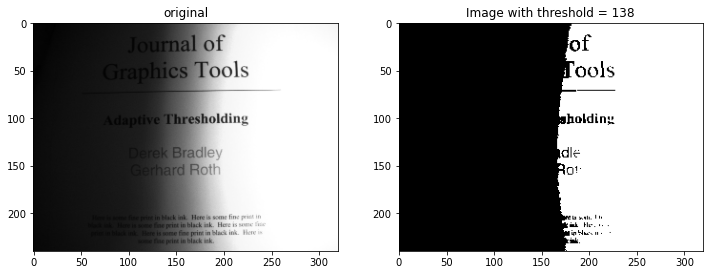

[[0.61425569 0.62602039 0.62209882 ... 0.60428471 0.60036314 0.59644157]
 [0.61033412 0.61817725 0.61425569 ... 0.61212784 0.61212784 0.61212784]
 [0.61033412 0.61817725 0.61817725 ... 0.61212784 0.61212784 0.61604941]
 ...
 [0.57896157 0.57896157 0.57504    ... 0.46825098 0.47609412 0.48001569]
 [0.57504    0.57504    0.57896157 ... 0.46040784 0.47217255 0.48001569]
 [0.57504    0.57504    0.57896157 ... 0.46040784 0.47217255 0.48001569]]
float64


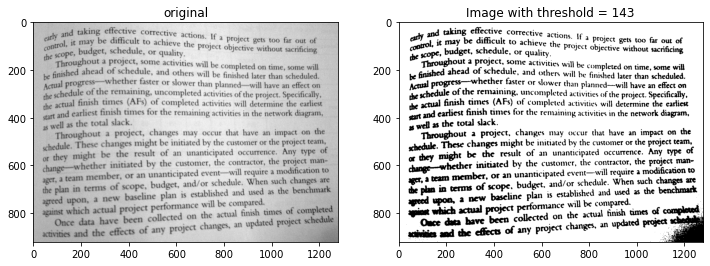

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]
uint8


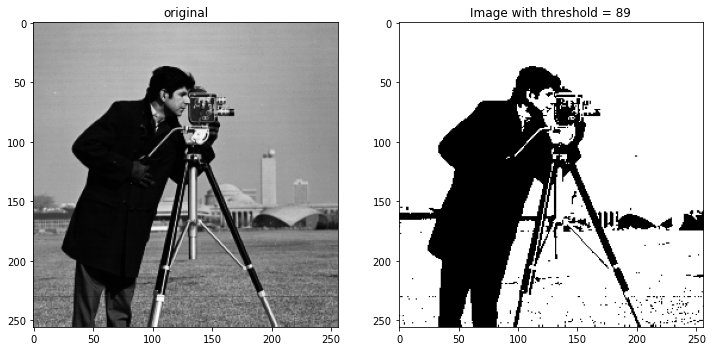

[[0.9232949  0.93113804 0.93505961 ... 0.58895255 0.58728588 0.59120745]
 [0.91937333 0.9232949  0.92721647 ... 0.59287412 0.59120745 0.59120745]
 [0.91545176 0.91545176 0.91937333 ... 0.59287412 0.59679569 0.59679569]
 ...
 [0.34139961 0.34139961 0.33355647 ... 0.29463843 0.29856    0.29463843]
 [0.30748941 0.30888824 0.31673137 ... 0.38875608 0.38091294 0.38483451]
 [0.29572471 0.30356784 0.31533255 ... 0.6358149  0.60836392 0.60836392]]
float64


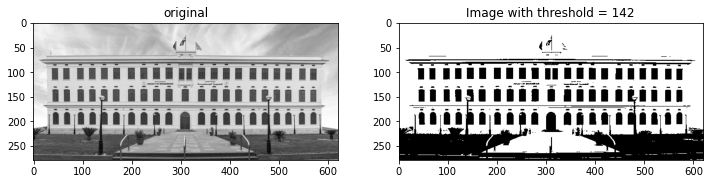

In [3]:

book = io.imread('book.png',as_gray = True) #==> uint8
print(book)
print(book.dtype)
threshold = getThreshold(book)
# Pixels with grey-level less than threshold will be equal to pure black and 
# otherwise pixels will be equal to white (0 and 255 for unit8). 
show_images([book , book > threshold],["original","Image with threshold = " + str(threshold)])
 

book = io.imread('book1.png',as_gray = True) #==> uint8
print(book)
print(book.dtype)
threshold = getThreshold(book)
# Pixels with grey-level less than threshold will be equal to pure black and 
# otherwise pixels will be equal to white (0 and 255 for unit8). 
show_images([book , book > threshold/255],["original","Image with threshold = " + str(threshold)])



book = io.imread('cameraman.png',as_gray = True)
print(book)
print(book.dtype)
threshold = getThreshold(book)
# Pixels with grey-level less than threshold will be equal to pure black and 
# otherwise pixels will be equal to white (0 and 255 for unit8). 
show_images([book , book > threshold],["original","Image with threshold = " + str(threshold)])
 
    

book = io.imread('cufe.png',as_gray = True)
print(book)
print(book.dtype)
threshold = getThreshold(book)
# Pixels with grey-level less than threshold will be equal to pure black and 
# otherwise pixels will be equal to white (0 and 255 for unit8). 
show_images([book , book > threshold/255],["original","Image with threshold = " + str(threshold)])
 

Image after dividing them to quarters


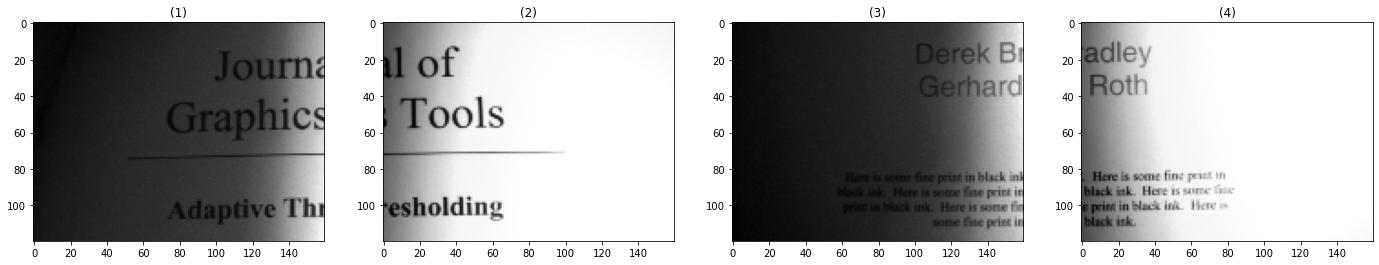

Image after applyting semi threshold on each quarter


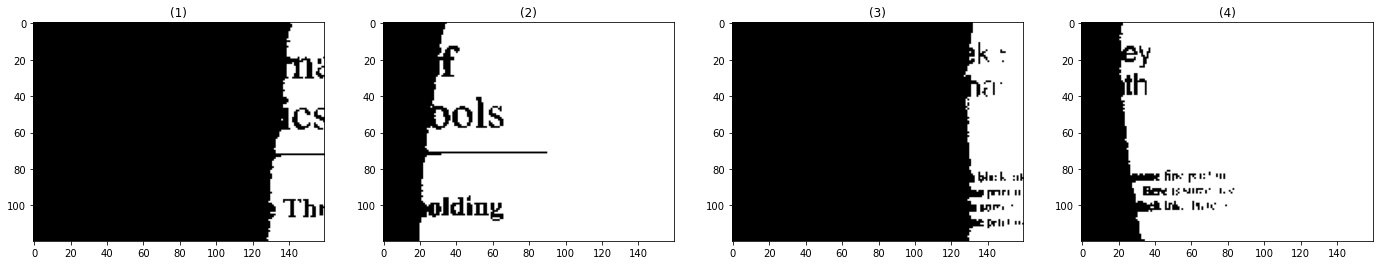

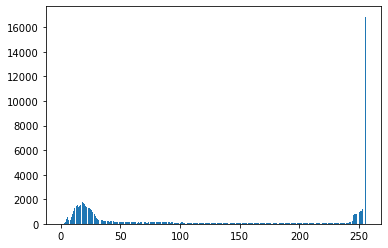

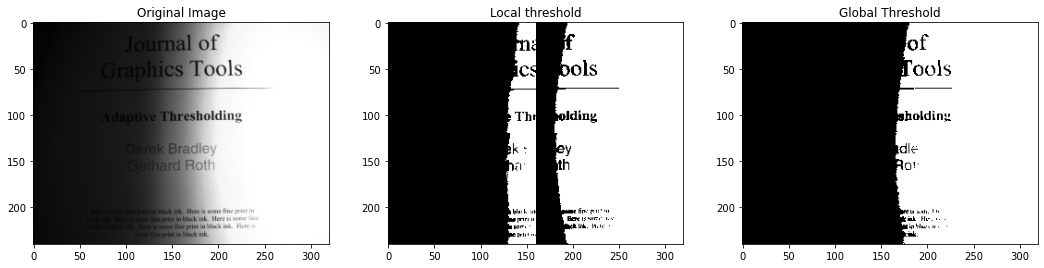

In [7]:
book = io.imread('book.png',as_gray = True)

halfImgHeight = int(book.shape[1] / 2)
halfImgWidth = int(book.shape[0] / 2)
topRightImage = book[0:halfImgWidth,0:halfImgHeight]
topLeftImage = book[0:halfImgWidth,halfImgHeight:]
bottomLeftImage = book[halfImgWidth:,0:halfImgHeight]
bottomRigthImage = book[halfImgWidth:,halfImgHeight:]
print("Image after dividing them to quarters")
show_images([topRightImage,topLeftImage,bottomLeftImage,bottomRigthImage])
topRightImage = topRightImage > getThreshold(topRightImage)
topLeftImage = topLeftImage > getThreshold(topLeftImage)
bottomLeftImage = bottomLeftImage > getThreshold(bottomLeftImage)
bottomRigthImage = bottomRigthImage > getThreshold(bottomRigthImage)
print("Image after applyting semi threshold on each quarter")
show_images([topRightImage,topLeftImage,bottomLeftImage,bottomRigthImage])

finalImg = np.block([[topRightImage,topLeftImage],[bottomLeftImage,bottomRigthImage]])
showHist(book)
threshold = getThreshold(book)
show_images([book,finalImg,book > threshold],["Original Image","Local threshold" ,"Global Threshold"])

